In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import json

import matplotlib.font_manager as fm

import warnings
warnings.filterwarnings(action='ignore')

In [34]:
#train_data
with open("./data/train_summary.json", "r", encoding="utf-8") as f:
    ddata = json.load(f) 
train_df = pd.DataFrame(ddata)
train_df["original_len"] = train_df["original"].apply(lambda x : len(x))
train_df["summ_len"] = train_df["summary"].apply(lambda x : len(x))
train_df["original_sentence_count"] = train_df["original"].apply(lambda x : len(x.split("."))-1)
train_df["summ_sentence_count"] = train_df["summary"].apply(lambda x : len(x.split("."))-1)
train_df

,original,summary,Meta,original_len,summ_len,original_sentence_count,summ_sentence_count
0,만정헌은 약 500여년전 현감벼슬을 지냈던 김자간이 경주에서 울산 명촌리에 들어와 ...,만정헌은 약 500여년전 현감벼슬을 지냈던 김자간이 경주에서 울산 명촌리에 들어와 ...,{'passage_id': 'REPORT-cultural_assets-10670-0...,343,159,6,2
1,부여 관북리유적은 1983년 9월 충청남도 기념물 제43호 전백제왕궁지(傳百濟王宮址...,부여 관북리유적은 1983년 9월 충청남도 기념물 제43호 전백제왕궁지(傳百濟王宮址...,{'passage_id': 'REPORT-cultural_assets-03009-0...,373,146,6,2
2,『문정공 김상헌 진적』은 청음 김상헌 친필로 일부는 그의 손자인 곡운 김수증이 보필...,"내용의 대부분이『청음집』에 수록 되어있으나, 본 자료에는 붉은색으로 교정을 가한 표...",{'passage_id': 'REPORT-cultural_assets-04844-0...,351,147,5,1
3,조선 후기 안동김씨 세도기 후반의 중심인물이었던 하옥 김좌근의 아들인 김병기(金炳冀...,조선 후기 안동김씨 세도기 후반의 중심인물이었던 하옥 김좌근의 아들인 김병기(金炳冀...,{'passage_id': 'REPORT-cultural_assets-10368-0...,465,198,7,2
4,외토리 마을에 있는 한 채의 비각 안에 나란히 서 있는 2기의 비이다. 앞에서 보아...,외토리 마을에 있는 한 채의 비각 안에 나란히 서 있는 2기의 비이다. 앞에서 보...,{'passage_id': 'REPORT-cultural_assets-06668-0...,482,117,6,2
...,...,...,...,...,...,...,...
18543,이어서 소셜벤처를 위한 보증프로그램인 임팩트보증을 담당하고 있는 기술보증기금의 정윤...,특히 이날 간담회의 모든 내용은 소셜벤처인 소리를보는통로의 인공지능(AI) 기반 실...,"{'passage_id': 'REPORT-briefing-62016-00003', ...",883,284,10,2
18544,"아라온호, 유빙수역에 갇힌 원양어선 구조에 나섰다\n 해양수산부(장관 문성혁)는 2...",해양수산부(장관 문성혁)는 2020. 1. 14.(화) 08시경(한국시간)부터 아라...,"{'passage_id': 'REPORT-briefing-57558-00001', ...",761,347,13,6
18545,"항만법‧항만 재개발법, 새단장 후 7월 30일 시행\n항만법하위법령 전부개정안,항만...",해양수산부(장관 문성혁)는 7월 21일(화) 국무회의에서 항만법 하위법령 전부개정안...,"{'passage_id': 'REPORT-briefing-65717-00001', ...",1119,278,10,5
18546,"또한, 인공지능 활용능력 보유인재 양성 및 인재인공지능 간 지적협업 환경 조성 등...","정부는 장기적으로 미래의 도전과제를 제시하고 고위험 대형연구에 집중투자하며, 기업이...","{'passage_id': 'REPORT-briefing-67224-00007', ...",761,263,7,2


In [35]:
#broadcast_data
with open("./data/train_summary_broadcast.json", "r", encoding="utf-8") as f:
    ddata = json.load(f) 
broad_df = pd.DataFrame(ddata)
broad_df["original_len"] = broad_df["original"].apply(lambda x : len(x))
broad_df["summ_len"] = broad_df["summary"].apply(lambda x : len(x))
broad_df["original_sentence_count"] = broad_df["original"].apply(lambda x : len(x.split("."))-1)
broad_df["summ_sentence_count"] = broad_df["summary"].apply(lambda x : len(x.split("."))-1)
broad_df

,original,summary,Meta,original_len,summ_len,original_sentence_count,summ_sentence_count
0,"해설]닭갈비집..\n길자, 초림, 앉아서 야채 다듬고 있다. 길자, 무겁게 한숨 내...","길자와 초림은 야채를 다듬다 한숨을 쉬고, 길자는 초림에게 노동팔 때문에 그런 것인...","{'passage_id': 'SCRIPT-drama-23059-00027', 'do...",889,190,54,3
1,해설]일식집 화장실(낮).\n나연](통화하다가 멈칫 놀라며) 엄마가 병원에 다녀가셨...,"나연은 의사와 통화 중에 엄마가 병원에 다녀갔다는 사실을 알게 되고, 자신이 직접 ...","{'passage_id': 'SCRIPT-drama-27057-00009', 'do...",473,199,15,3
2,"해설]경민 사무실..\n책상 위, 서류들 잔뜩 쌓여있고. 경민, 그 서류들 천천히 ...",아버지가 갖고 있던 루비에 대한 서류들을 살펴보다 루비의 유산 이력을 발견한 경민은...,"{'passage_id': 'SCRIPT-drama-23084-00001', 'do...",705,183,43,3
3,해설]가비 인터뷰실.\n중희 테이블 앞에 앉아 쓰린 속 부여잡으며 기다리고 있다. ...,인터뷰실에서 미영이 중희에게 해장라떼를 건넨다. 인터뷰가 늦어지자 미영과 중희는 서...,"{'passage_id': 'SCRIPT-drama-33015-00013', 'do...",855,171,55,3
4,"해설]단풍네 집 거실.\n종순, 단풍, 차 마시며 자동차 팜플릿, 견적서 보며 수다...",종순과 단풍이 자동차 팜플릿과 견적서를 보고 종순이 차에 대해 물어보자 단풍은 너무...,"{'passage_id': 'SCRIPT-drama-50913-00025', 'do...",480,197,37,3
...,...,...,...,...,...,...,...
13422,화자1]일본은 1941년 말 태평양 전쟁을시작하고요.\n동시에 서구의 식민지로 지명...,"1941년, 일본은 태평양 전쟁을 시작하며 서구의 식민지로 있던 국가들도 공격했다....","{'passage_id': 'SCRIPT-history-00193-00017', '...",392,147,11,3
13423,화자1]국가를 위한 대승적인 생각을 갖고있었다고 볼 수 있지 않을까요?\n화자2]그...,"이승만 정권은 폭력단, 깡패와 손을 잡았다. 당시 대부분의 정치인들은 폭력집단과 직...","{'passage_id': 'SCRIPT-history-00197-00011', '...",504,93,15,3
13424,"해설]후연군 진영, 지휘소(밤).\n모용희를 비롯해 모든 제장들이 모여 있고, 모용...",후연군 진영의 지휘소에서 모용희를 비롯한 제장들이 고구려군과의 전투를 논하는 가운데...,"{'passage_id': 'SCRIPT-history-90087-00019', '...",1065,193,63,3
13425,해설]대조영 군막 안.\n신홍이 결박당한 채 끌려 들어오고 있다. 퉁소와 마파가 양...,대조영은 신홍에게 이해고의 위치를 묻고 신홍은 이해고를 찾을 수 없을 거라고 말한다...,"{'passage_id': 'SCRIPT-history-00344-00014', '...",1037,189,67,3


In [36]:
train_df['doc_type']='train'
broad_df['doc_type']='broad'
concat_df = pd.concat([train_df,broad_df], ignore_index=True)

In [24]:
def violinbox_len(type_len):
    print('train data-----------------------------')
    print('최댓값: ',train_df.describe()[type_len]['max'])
    print('최솟값: ',train_df.describe()[type_len]['min'])
    print('평균: ',train_df.describe()[type_len]['mean'])
    print('broadcast data-----------------------------')
    print('최댓값: ',broad_df.describe()[type_len]['max'])
    print('최솟값: ',broad_df.describe()[type_len]['min'])
    print('평균: ',broad_df.describe()[type_len]['mean'])
    print('\n\n')
    fig, ax = plt.subplots(figsize=(16,9),nrows=2)
    ax=sns.boxplot(data=concat_df, x=type_len,y="doc_type",
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                          "markersize":"5"},
                palette='Set2',
                ax=ax[0])

    ax.set(xlabel=None) # 위에 있는 plot xlabel 삭제

    ax=sns.violinplot(data=concat_df, x=type_len,y="doc_type",palette='Set2');
    plt.show()

## Original text

train data-----------------------------
최댓값:  1543.0
최솟값:  300.0
평균:  905.346937675221
broadcast data-----------------------------
최댓값:  2056.0
최솟값:  384.0
평균:  688.3441572950026





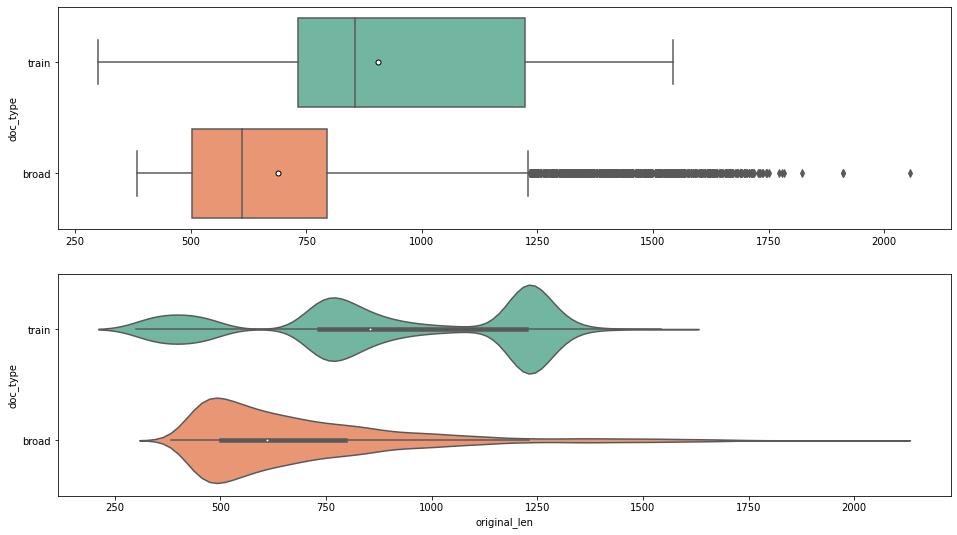

In [27]:
#original text
violinbox_len("original_len")

## Summary text

train data-----------------------------
최댓값:  1097.0
최솟값:  42.0
평균:  189.8581518222989
broadcast data-----------------------------
최댓값:  223.0
최솟값:  47.0
평균:  166.68406941237805





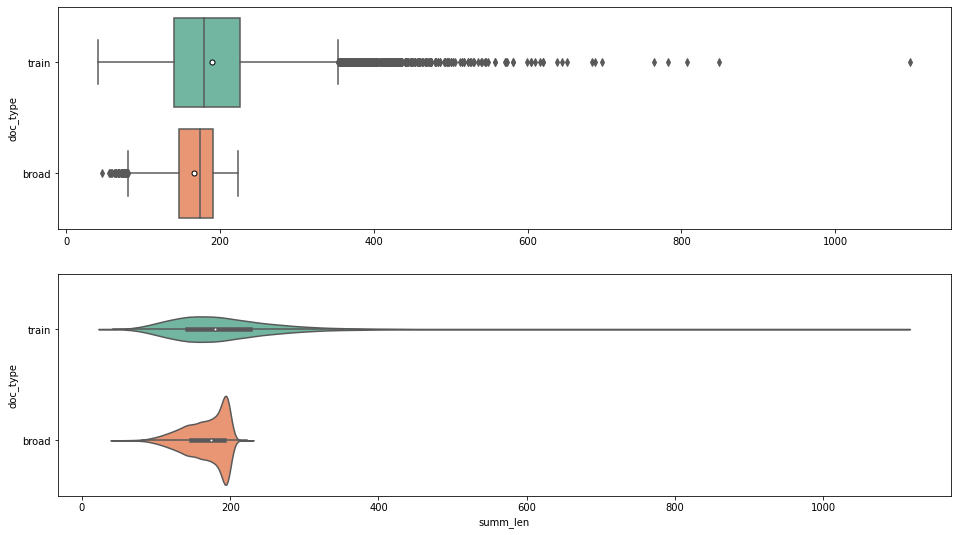

In [28]:
#summary text
violinbox_len("summ_len")

## Original_sentence_count

train data-----------------------------
최댓값:  54.0
최솟값:  1.0
평균:  15.12621306879448
broadcast data-----------------------------
최댓값:  233.0
최솟값:  3.0
평균:  41.71594548298205





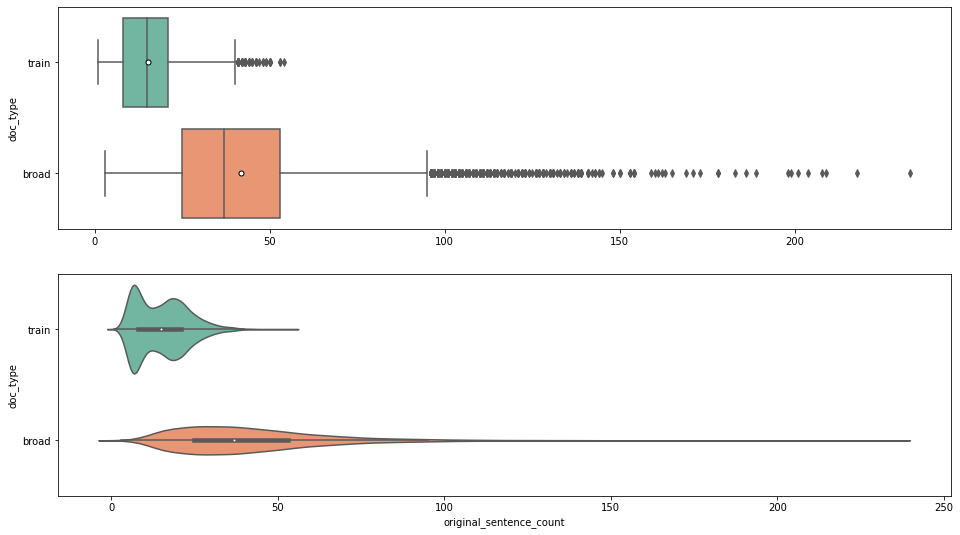

In [37]:
#summary text
violinbox_len("original_sentence_count")

## Summary_sentence_count

train data-----------------------------
최댓값:  23.0
최솟값:  0.0
평균:  2.912281647616994
broadcast data-----------------------------
최댓값:  4.0
최솟값:  3.0
평균:  3.0005958144038134





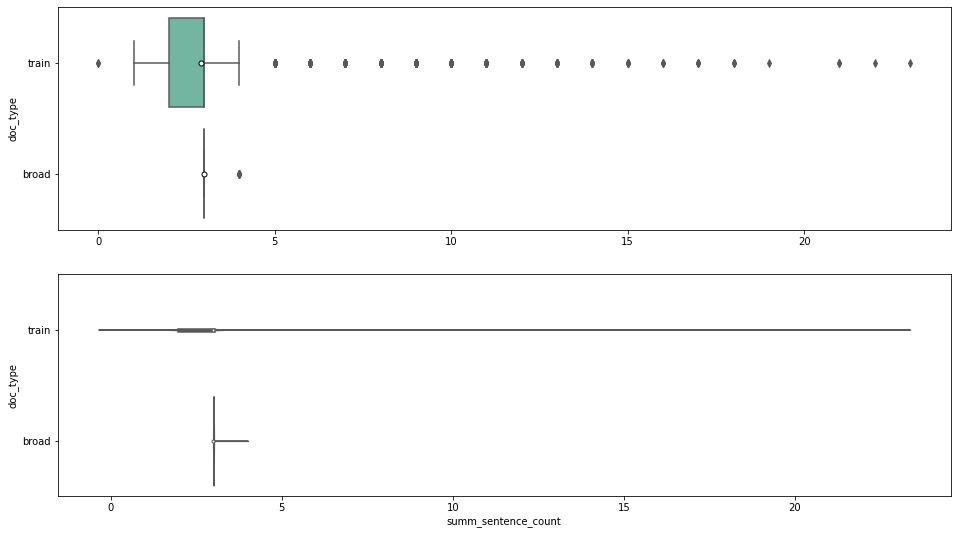

In [38]:
violinbox_len("summ_sentence_count")